## PCA Demonstration in Python

In [2]:
# Importing the required libraries
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Read and take a look at the data

In [3]:
data = pd.read_csv("data/Iris.csv")
print(data.head())
y = data.pop("iris")
print(data.head())
print(data.describe())

   sepal length  sepal width  petal length  petal width         iris
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
   sepal length  sepal width  petal length  petal width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
       sepal length  sepal width  petal length  petal width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min       

#### Scaling the data

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = data.copy()
x = scaler.fit_transform(X)
x[:5,:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

### Applying PCA on the data

In [5]:
from sklearn.decomposition import PCA

In [6]:
#?PCA

In [7]:
pca = PCA(random_state=42)
pca.fit(x)
pca.components_

array([[ 0.52237162, -0.26335492,  0.58125401,  0.56561105],
       [ 0.37231836,  0.92555649,  0.02109478,  0.06541577],
       [-0.72101681,  0.24203288,  0.14089226,  0.6338014 ],
       [-0.26199559,  0.12413481,  0.80115427, -0.52354627]])

In [8]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523, 0.03683832, 0.00515193])

<BarContainer object of 4 artists>

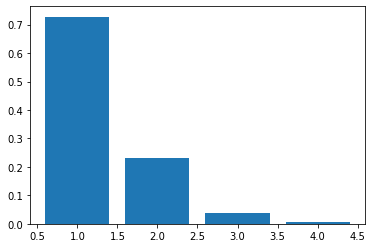

In [9]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

#### Making the scree plot

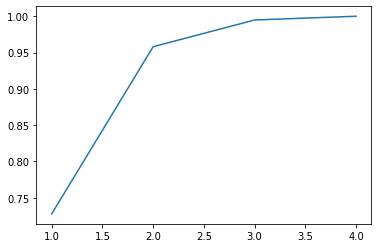

In [10]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1,len(var_cumu)+1), var_cumu)

#### PCA with 2 components

In [11]:
pc2 = PCA(n_components=2, random_state=42)
newdata = pc2.fit_transform(x)
newdata.shape

(150, 2)

In [12]:
# Making a dataframe out of it for convenience
df = pd.DataFrame(newdata, columns=["PC1", "PC2"])
print(df.head())
df_final = pd.concat([df, y], axis=1)
print(df_final.head())

        PC1       PC2
0 -2.264542  0.505704
1 -2.086426 -0.655405
2 -2.367950 -0.318477
3 -2.304197 -0.575368
4 -2.388777  0.674767
        PC1       PC2         iris
0 -2.264542  0.505704  Iris-setosa
1 -2.086426 -0.655405  Iris-setosa
2 -2.367950 -0.318477  Iris-setosa
3 -2.304197 -0.575368  Iris-setosa
4 -2.388777  0.674767  Iris-setosa


/Users/sreedevigattu/sree/PGDS/MachineLearning/venv/lib/python3.7/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


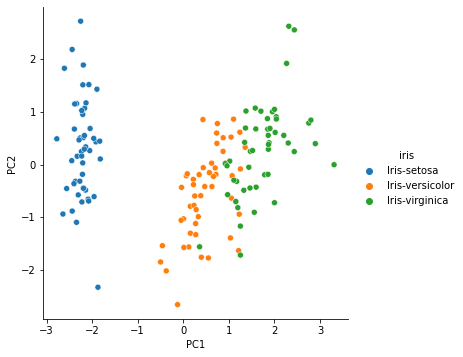

In [13]:
# Plotting the data
sns.pairplot(data=df_final, x_vars=["PC1"], y_vars=["PC2"], hue = "iris", size=5)

### Practice Question

In [15]:
data_ratings = pd.read_csv("data/Ratings.csv")
print(data_ratings.head())
print(data_ratings.describe())

   B1  B2  B3  B4  B5
0   1   0   4   0   3
1   2   3   4   3   2
2   3   3   2   4   2
3   4   4   3   5   4
4   5   1   4   2   2
             B1        B2        B3        B4        B5
count  7.000000  7.000000  7.000000  7.000000  7.000000
mean   3.285714  2.285714  3.142857  3.142857  3.142857
std    1.380131  1.380131  1.214986  1.772811  1.214986
min    1.000000  0.000000  1.000000  0.000000  2.000000
25%    2.500000  1.500000  2.500000  2.500000  2.000000
50%    4.000000  3.000000  4.000000  3.000000  3.000000
75%    4.000000  3.000000  4.000000  4.500000  4.000000
max    5.000000  4.000000  4.000000  5.000000  5.000000


In [16]:
pca = PCA(random_state=42)
pca.fit(data_ratings)
pca.components_

array([[-0.31118649, -0.48101502,  0.35622281, -0.69199674, -0.25696953],
       [ 0.90672615, -0.31113879,  0.25507174, -0.09225738,  0.08641369],
       [-0.12857449, -0.38163517, -0.34923551, -0.16484744,  0.82986931],
       [ 0.1452065 , -0.34290409, -0.79235694, -0.05662208, -0.47989194],
       [-0.20831306, -0.63920934,  0.24134777,  0.69444104, -0.08671783]])

In [25]:
temp = pca.explained_variance_ratio_ * 100
temp.astype(int)

array([65, 15, 13,  6,  0])